In [1]:
from src.base_models import *
from src.dataset_lib import *
from src.ode_solvers import *
from src.comp_models import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

c:\Users\JoCraft\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [2]:
GaussianMix = GaussianMixture.symmetric_2D(4,1.0)

gaussian_path = GaussianConditionalProbabilityPath(p_data=GaussianMix, alpha=LinearAlpha(), beta = SquareRootBeta(), device=device).to(device)

model1 = BasicMLP(input_dim=2, hidden_dims=[64,64,64,64])

trainer = FlowDiffTrainer(path=gaussian_path, modeltype="Diffusion", model=model1)

trainer.train_loop(num_epochs=20000, device=device, lr=1e-3, n= 1000)

In Epoch 0 we have a loss of 51.236045837402344
In Epoch 1000 we have a loss of 10.165976524353027
In Epoch 2000 we have a loss of 8.7376070022583
In Epoch 3000 we have a loss of 7.69016170501709
In Epoch 4000 we have a loss of 7.787198066711426
In Epoch 5000 we have a loss of 11.535929679870605
In Epoch 6000 we have a loss of 15.450762748718262
In Epoch 7000 we have a loss of 6.819131851196289
In Epoch 8000 we have a loss of 8.781299591064453
In Epoch 9000 we have a loss of 11.969273567199707
In Epoch 10000 we have a loss of 6.563396453857422
In Epoch 11000 we have a loss of 19.128009796142578
In Epoch 12000 we have a loss of 8.868070602416992
In Epoch 13000 we have a loss of 9.25017261505127
In Epoch 14000 we have a loss of 5.005487442016602
In Epoch 15000 we have a loss of 10.056877136230469
In Epoch 16000 we have a loss of 9.069948196411133
In Epoch 17000 we have a loss of 5.222352504730225
In Epoch 18000 we have a loss of 5.954380035400391
In Epoch 19000 we have a loss of 11.11043

In [3]:
rec1 = RectangleDataset(device=device, coords= [(-5.0,5.0),(-10,10)])

rec2 = RectangleDataset(device=device, coords =  [(-10,10), (-5.0,5.0)])

swiss = union_sample([rec1,rec2])

gaussian_path2 = GaussianConditionalProbabilityPath(p_data=swiss, alpha=LinearAlpha(), beta = SquareRootBeta(), device=device).to(device)

model2 = BasicMLP(input_dim=2, hidden_dims=[64,64,64,64])

trainer2 = FlowDiffTrainer(path=gaussian_path2, modeltype="Diffusion", model=model2)

trainer2.train_loop(num_epochs=20000, device=device, lr=1e-3, n= 1000)

In Epoch 0 we have a loss of 5.690806865692139
In Epoch 1000 we have a loss of 7.049476146697998
In Epoch 2000 we have a loss of 6.396113872528076
In Epoch 3000 we have a loss of 5.156294345855713
In Epoch 4000 we have a loss of 9.67346477508545
In Epoch 5000 we have a loss of 19.33754539489746
In Epoch 6000 we have a loss of 12.264928817749023
In Epoch 7000 we have a loss of 7.717829704284668
In Epoch 8000 we have a loss of 8.132235527038574
In Epoch 9000 we have a loss of 9.94864559173584
In Epoch 10000 we have a loss of 5.340536117553711
In Epoch 11000 we have a loss of 20.53721809387207
In Epoch 12000 we have a loss of 7.273303508758545
In Epoch 13000 we have a loss of 5.1718831062316895
In Epoch 14000 we have a loss of 10.267691612243652
In Epoch 15000 we have a loss of 9.340719223022461
In Epoch 16000 we have a loss of 14.895522117614746
In Epoch 17000 we have a loss of 5.990588188171387
In Epoch 18000 we have a loss of 10.183650970458984
In Epoch 19000 we have a loss of 8.758313

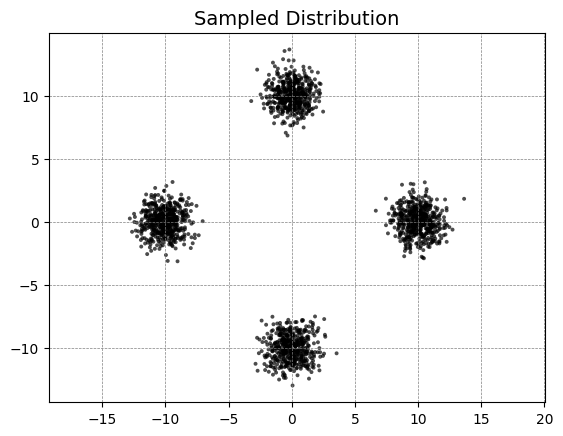

In [4]:
plot_samples(GaussianMix.sample(2000))
plt.show()

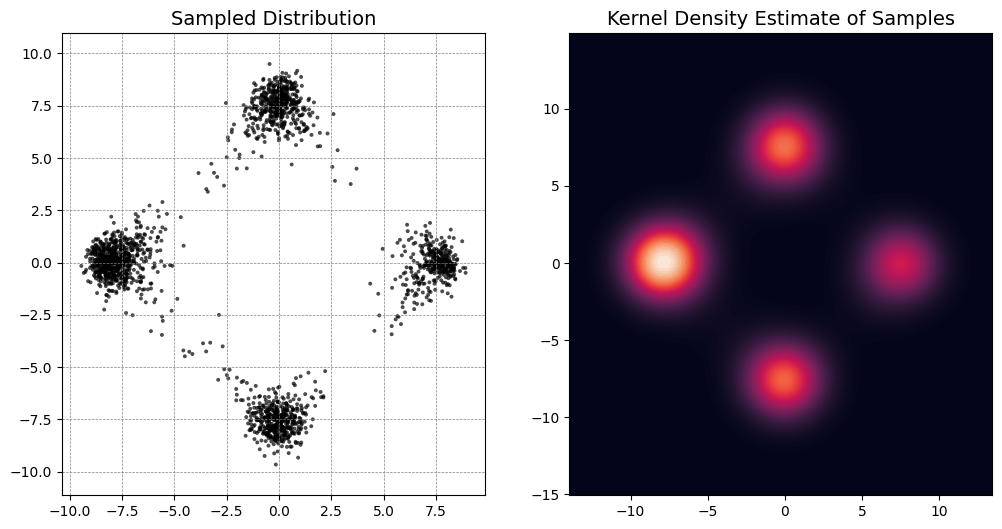

In [5]:
models = [model1,model2]

sde = CompLangevin(models=models, sigma = 0.5, alpha = LinearAlpha(), beta=SquareRootBeta())

comp_solver = EulerSDESolver(sde)

comp_sampler = Sampler(comp_solver)

steps= torch.linspace(0.01, 1, 2000).view(1,-1,1).expand(2000,-1,1).to(device) 
samples = comp_sampler.sample_without_traj(gaussian_path.p_init.sample(2000), steps)
figsize=(12, 6)

fig, axes = plt.subplots(1, 2, figsize = figsize)
plot_samples(samples, ax=axes[0], kde=True)
plot_kde(samples, ax = axes[1], cmap="rocket")

plt.show()

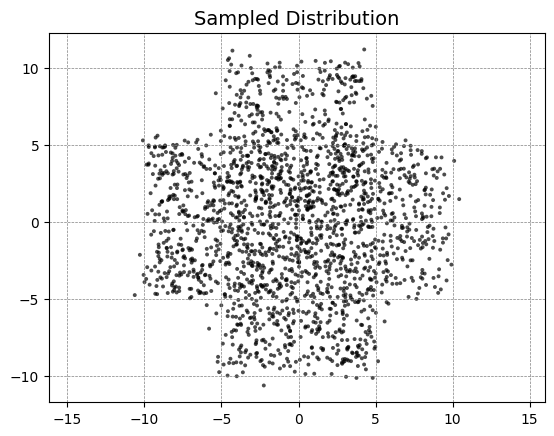

In [6]:
models = [model2]

sde = CompLangevin(models=models, sigma = 1, alpha = LinearAlpha(), beta=SquareRootBeta())

comp_solver = EulerSDESolver(sde)

comp_sampler = Sampler(comp_solver)

steps= torch.linspace(0.05, 1, 2000).view(1,-1,1).expand(2000,-1,1).to(device) 

plot_samples(comp_sampler.sample_without_traj(gaussian_path.p_init.sample(2000), steps),contour=False)

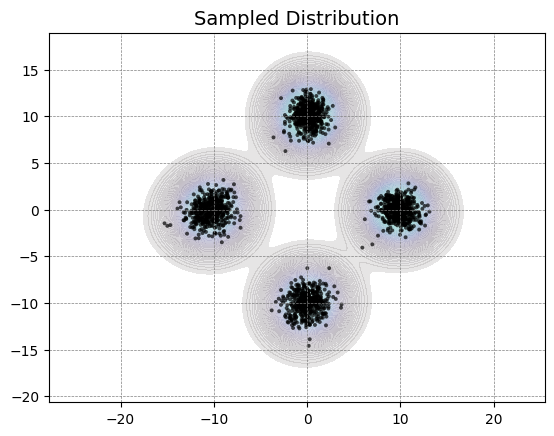

In [7]:
models = [model1]

sde = CompLangevin(models=models, sigma = 1, alpha = LinearAlpha(), beta=SquareRootBeta())

comp_solver = EulerSDESolver(sde)

comp_sampler = Sampler(comp_solver)

steps= torch.linspace(0.01, 1, 2000).view(1,-1,1).expand(2000,-1,1).to(device) 

plot_samples(comp_sampler.sample_with_traj(gaussian_path.p_init.sample(2000), steps)[-1], scatter=True,kde=True)